In [2]:
#Multicollinearity Demonstration with Regression (Before vs After Fix)

#Author: Madhu
#Purpose:
#- Show how multicollinearity occurs when predictors are highly correlated
#- Detect it using Correlation and Variance Inflation Factor (VIF)
#- Compare regression results before and after removing the redundant variable

In [17]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt

## 1) Load or Generate Dataset

In [20]:
DATA_FILE = "multicollinearity_example.xlsx"   # change if needed
df = pd.read_excel(DATA_FILE)

print("=== Sample Data ===")
print(df.head(), "\n")

=== Sample Data ===
   house_size  num_rooms   price
0        1926          9  357471
1        1660          9  317684
2        1930          9  356708
3        1895         10  349526
4        1844          9  338662 



## 2) Select predictors (independent variables only)

In [21]:
X = df[["house_size", "num_rooms"]]   # <- adjust column names if different

## 3) Correlation heatmap

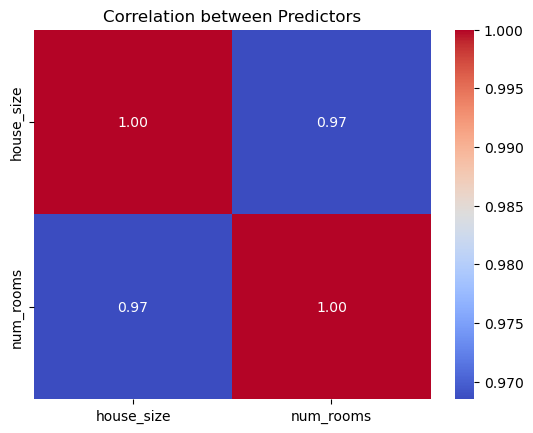

In [22]:
sns.heatmap(X.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Predictors")
plt.show()


## 4) VIF BEFORE (with both predictors)

In [24]:
Xb_const = sm.add_constant(X_before)
vif_before = pd.DataFrame({
    "feature": Xb_const.columns,
    "VIF": [variance_inflation_factor(Xb_const.values, i) for i in range(Xb_const.shape[1])]
})
print("=== VIF BEFORE (multicollinearity present) ===")
print(vif_before, "\n")


=== VIF BEFORE (multicollinearity present) ===
      feature        VIF
0       const  16.763384
1  house_size  16.125573
2   num_rooms  16.125573 



## 5) FIX: Drop the redundant/collinear predictor ('num_rooms')

In [25]:
X_after = X_before.drop(columns=["num_rooms"])

## 6) VIF AFTER (mitigated)

In [26]:
Xa_const = sm.add_constant(X_after)
vif_after = pd.DataFrame({
    "feature": Xa_const.columns,
    "VIF": [variance_inflation_factor(Xa_const.values, i) for i in range(Xa_const.shape[1])]
})
print("=== VIF AFTER (after dropping 'num_rooms') ===")
print(vif_after, "\n")


=== VIF AFTER (after dropping 'num_rooms') ===
      feature        VIF
0       const  16.748528
1  house_size   1.000000 



## 7) Optional: show correlation after fix

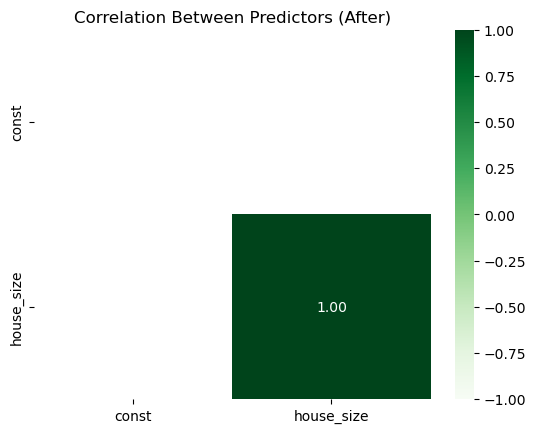

In [27]:
sns.heatmap(X_after.corr(), annot=True, cmap="Greens", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Between Predictors (After)")
plt.show()

## 8) Quick takeaway


        🔎 Multicollinearity Summary
📊 Correlation between 'house_size' & 'num_rooms': 0.97
⚠️  High correlation → strong chance of multicollinearity.

📉 BEFORE Fix: VIF was high → unstable coefficients.
✅ AFTER Fix (dropping 'num_rooms'): VIF dropped → model more stable & interpretable.

💡 Rule of Thumb: VIF > 10 = serious multicollinearity.



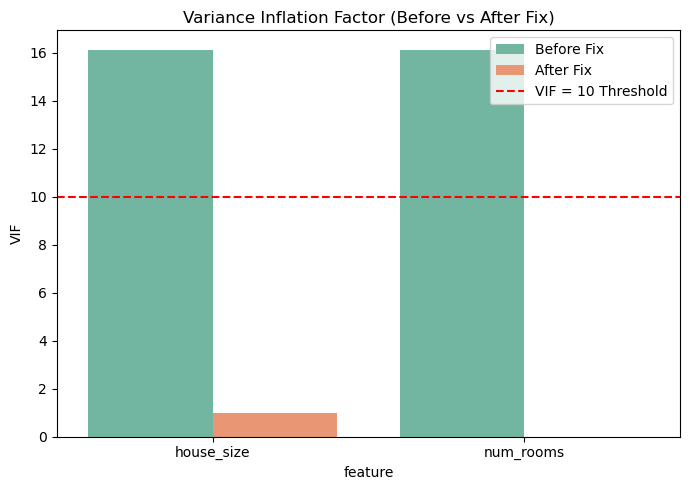

In [29]:
corr_val = X_before.corr().loc["house_size", "num_rooms"]

print("\n" + "="*50)
print("        🔎 Multicollinearity Summary")
print("="*50)
print(f"📊 Correlation between 'house_size' & 'num_rooms': {corr_val:.2f}")
print("⚠️  High correlation → strong chance of multicollinearity.\n")
print("📉 BEFORE Fix: VIF was high → unstable coefficients.")
print("✅ AFTER Fix (dropping 'num_rooms'): VIF dropped → model more stable & interpretable.\n")
print("💡 Rule of Thumb: VIF > 10 = serious multicollinearity.")
print("="*50 + "\n")

# Combine before/after for plotting
vif_before["Stage"] = "Before Fix"
vif_after["Stage"] = "After Fix"
vif_compare = pd.concat([vif_before, vif_after])

# Drop the constant (intercept) to focus on predictors
vif_compare = vif_compare[vif_compare["feature"] != "const"]

# Plot VIF comparison
plt.figure(figsize=(7,5))
sns.barplot(data=vif_compare, x="feature", y="VIF", hue="Stage", palette="Set2")
plt.axhline(10, color="red", linestyle="--", label="VIF = 10 Threshold")
plt.title("Variance Inflation Factor (Before vs After Fix)")
plt.legend()
plt.tight_layout()
plt.show()